# Importing the necessary libraries that will be required.

In [1]:
#importing the necessary libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization
from keras.optimizers import Adam
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score
!pip install keras==2.12.0
from keras.wrappers.scikit_learn import KerasClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading to the telecom customer churn dataset

In [2]:
# Loading the telecom customer churn dataset
df = pd.read_csv('/content/drive/My Drive/Assignment/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

# This is to view the telecom churn dataset

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploring the telecom churn dataset for better understanding.

In [4]:
# Exploring the dataset
print(df.dtypes)
print(df.head())
print(df.info())
print(df.describe())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No  

# Checking to see if there are null values in the dataset. And since there are no missing values in the various coloumns, there is no need drop any column with null values

In [5]:
#Checking for the sum missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Dropping the customerID columm as it only uniquely identifies the different customers and is not relevant for the analysis

In [6]:
#Dropping the customerID column as it is not relevant for the analysis
df.drop('customerID', axis=1, inplace=True)

#Total charge column should be a float but it is showing as object.
#So I have to convert it to float.

In [7]:
#Converting TotalCharges column which is an object to numeric.
# errors = 'coerce’ means, if invalid parsing occur then set NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Checking to see the data types

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Checking to see if there are missing values

In [9]:
#Checking for missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Filling null values in TotalCharges with the mean value

In [10]:
#Replace the missing values in TotalCharges with the mean value
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Making analysis of the numeric columns with barchart

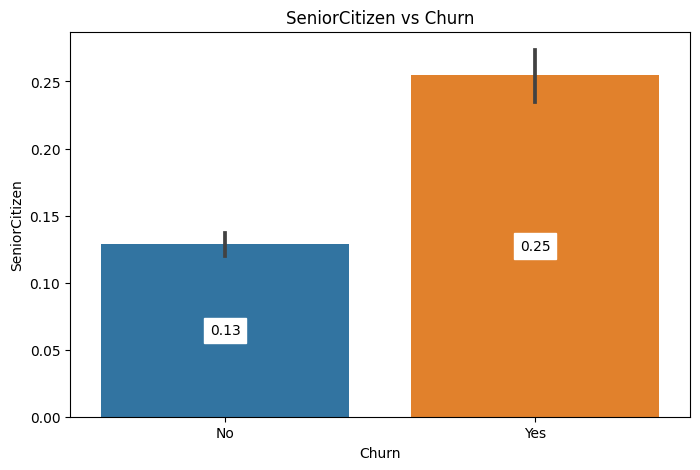

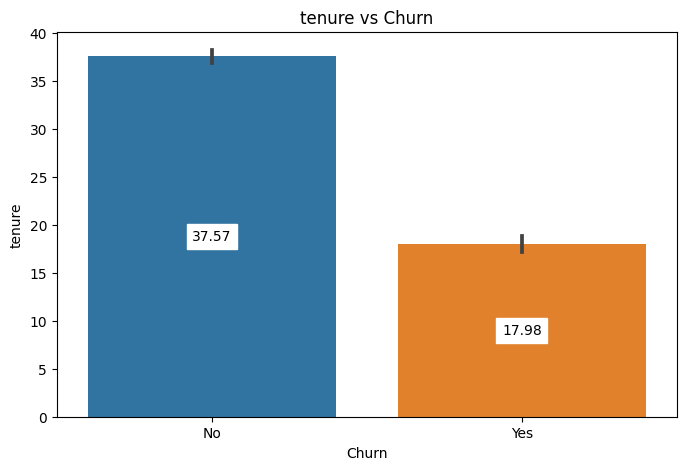

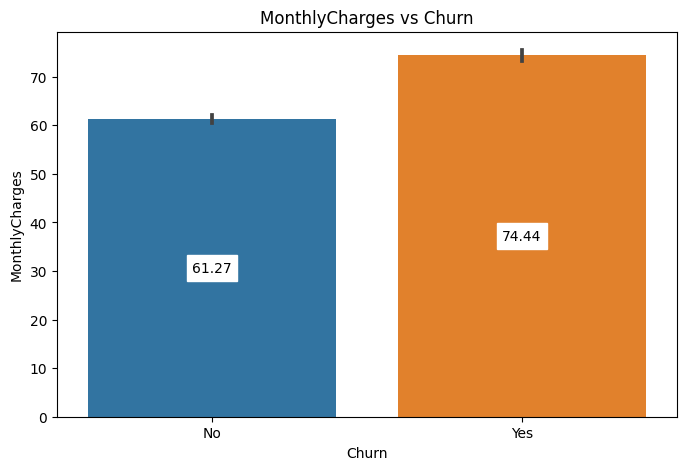

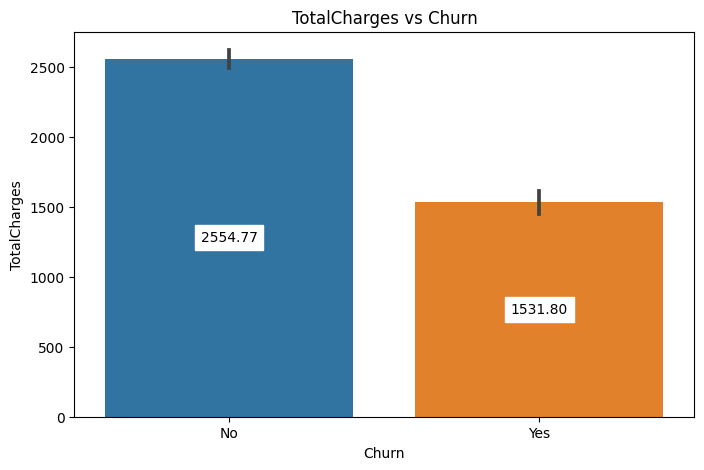

In [11]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_columns:
    if col != 'Churn':
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(x='Churn', y=col, data=df, estimator='mean')
        plt.title(f'{col} vs Churn')
        plt.xlabel('Churn')
        plt.ylabel(col)

        # Labeling the bars
        for k in ax.containers:
            ax.bar_label(
                k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
            )

        plt.show()


# Interpretation of the barchart
**Senior Citizen:**

Approximately 0.13 average number of customers who are citizens will not churn and 0.25 will churn. This indicates that customers who are senior citizens are more likely to churn than those who are not senior citizens.

**Tenure Months:**

For customers who have not churned, the average tenure is approximately 37.57 months. And for customers who have churned, the average tenure is  lower, at around 17.98 months indicating that customers who have stayed longer with the company are less likely to churn, as suggested by the lower average tenure for churned customers.

**Monthly Charges:**

For customers who have not churned, the average monthly charges are approximately 61.27 dollars and customers who have churned, the average monthly charges are slightly higher, around 74.44 dollars indicating that customers who have churned tend to have slightly higher monthly charges on average.

**Total Charges:**

For customers who have not churned, the average total charges are approximately 2,554.77 dollars and customers who have churned, the average total charges are lower, around 1,531.80 dollars suggesting that customers who have accumulated higher total charges are more likely to continue their subscription and not churn.

# Making analysis of the non-numeric columns with barchart

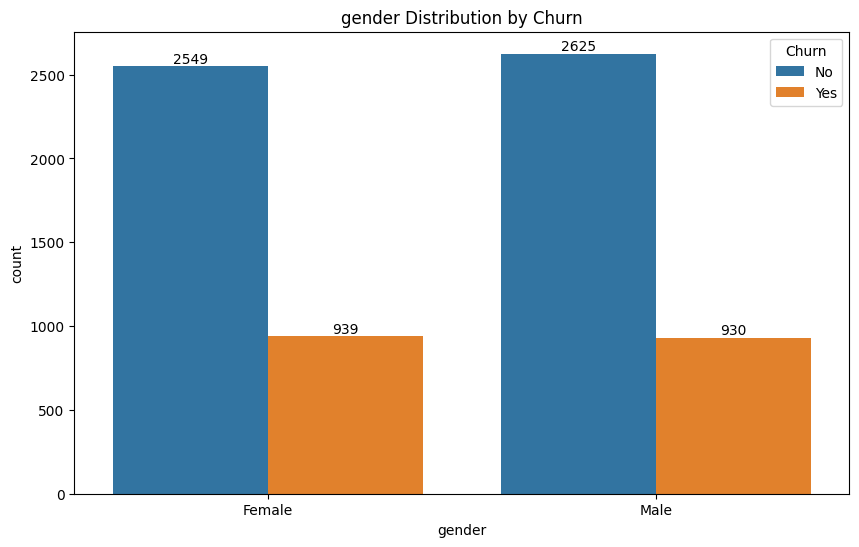

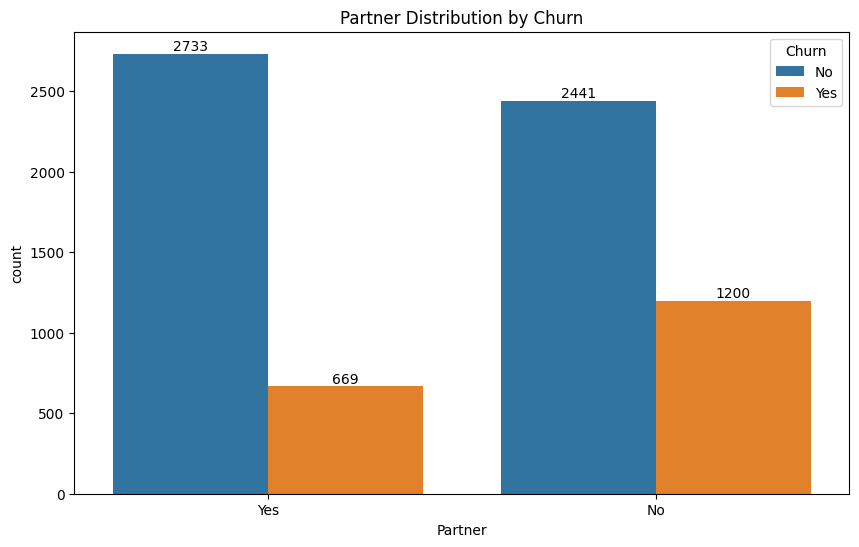

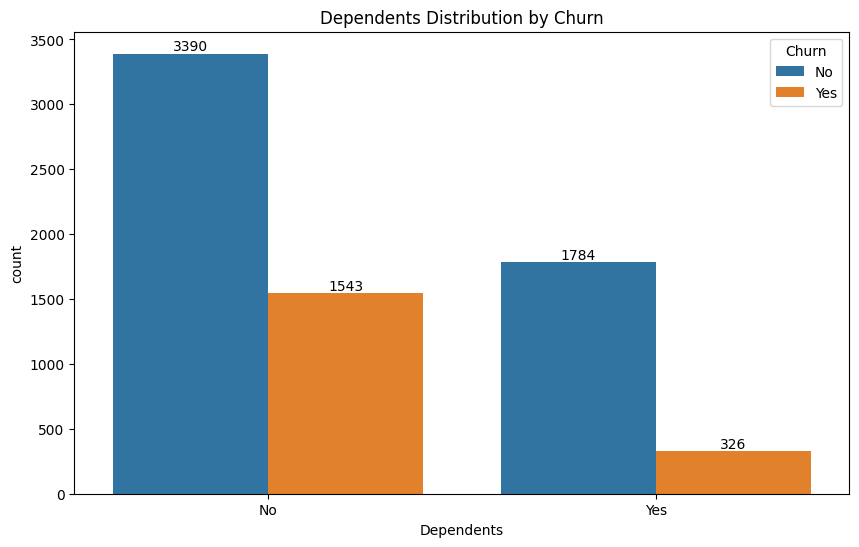

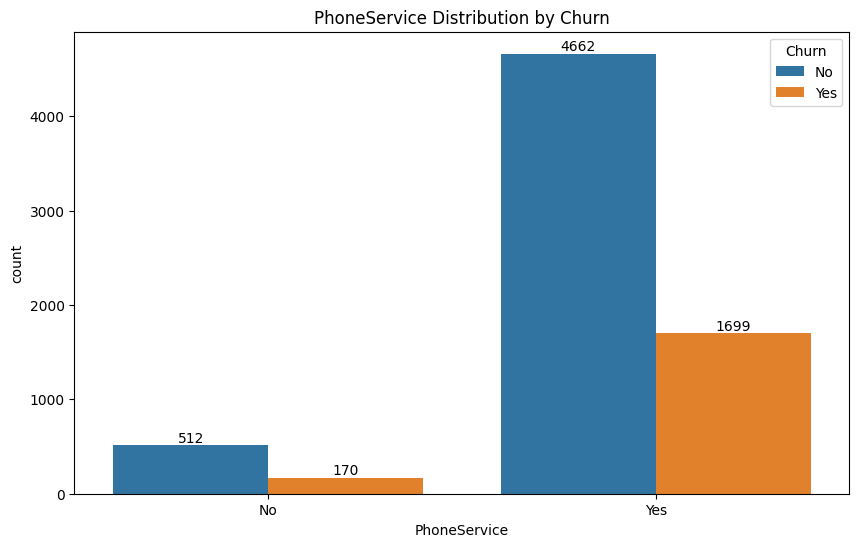

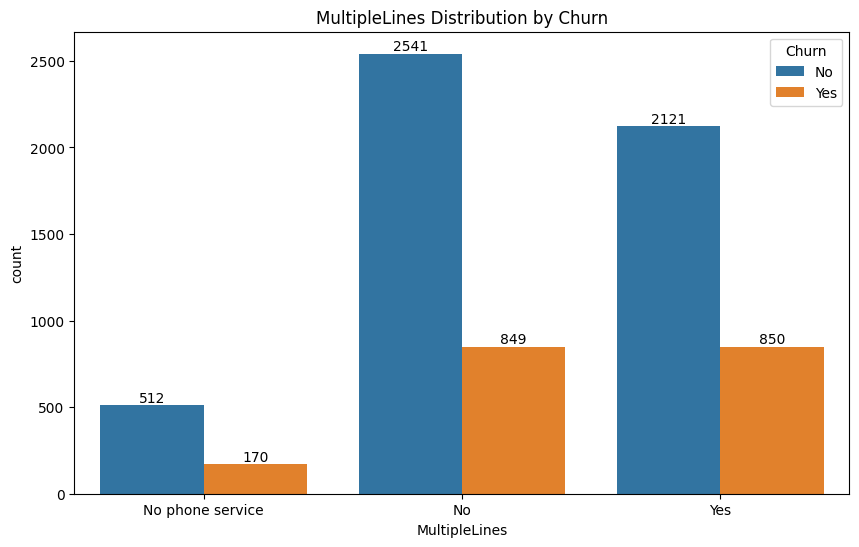

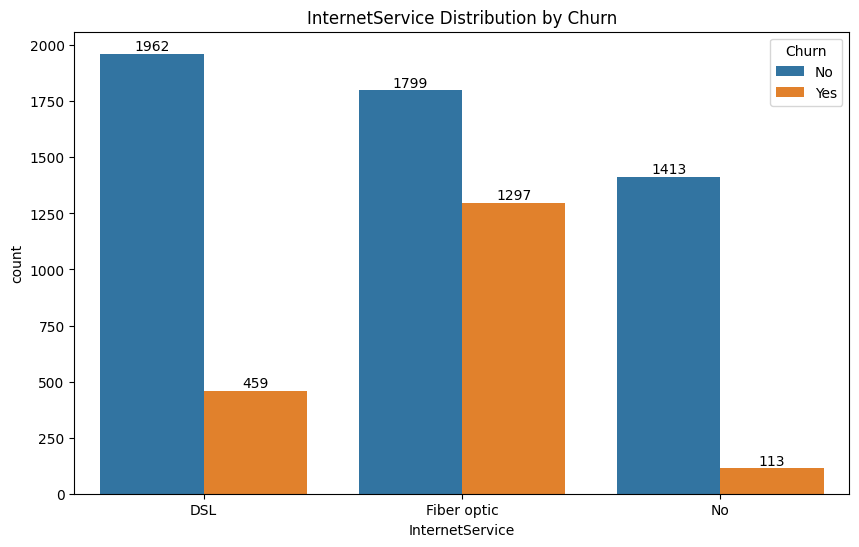

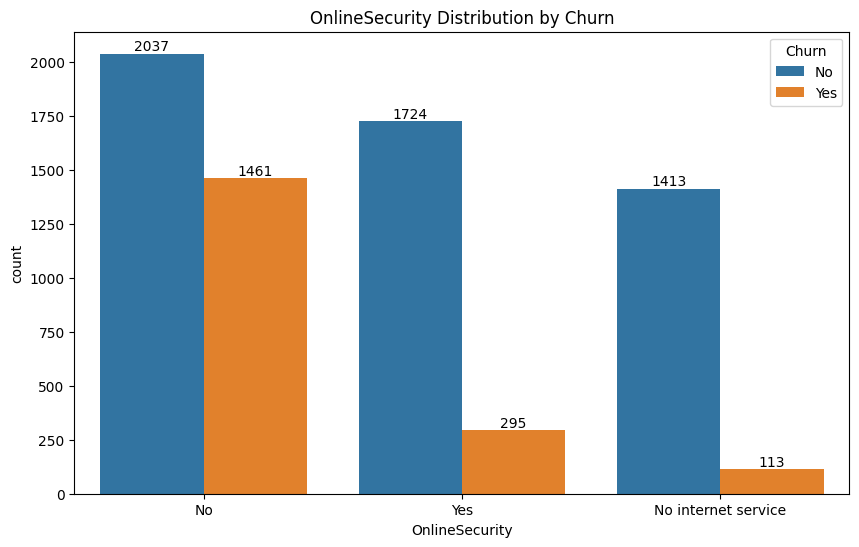

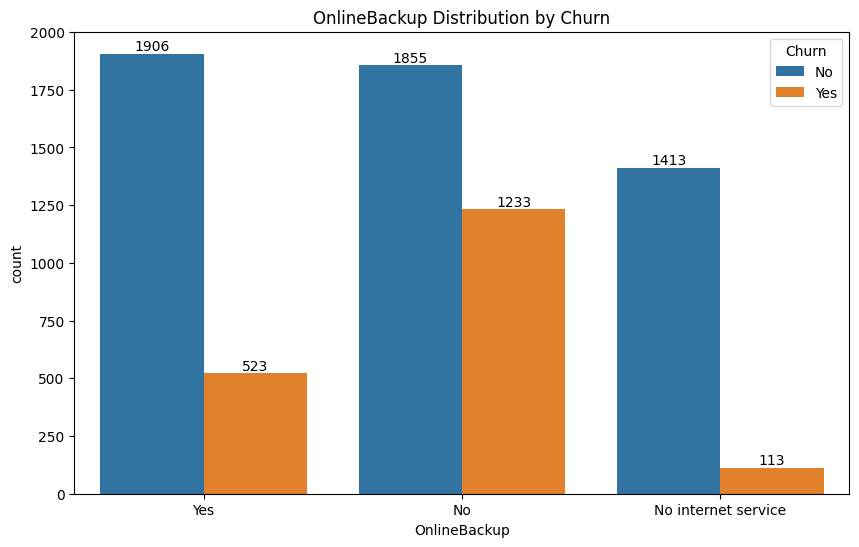

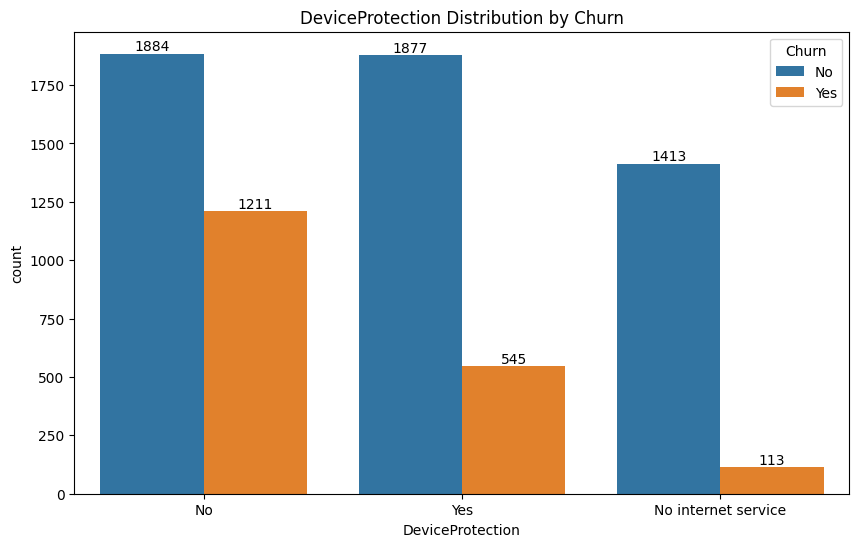

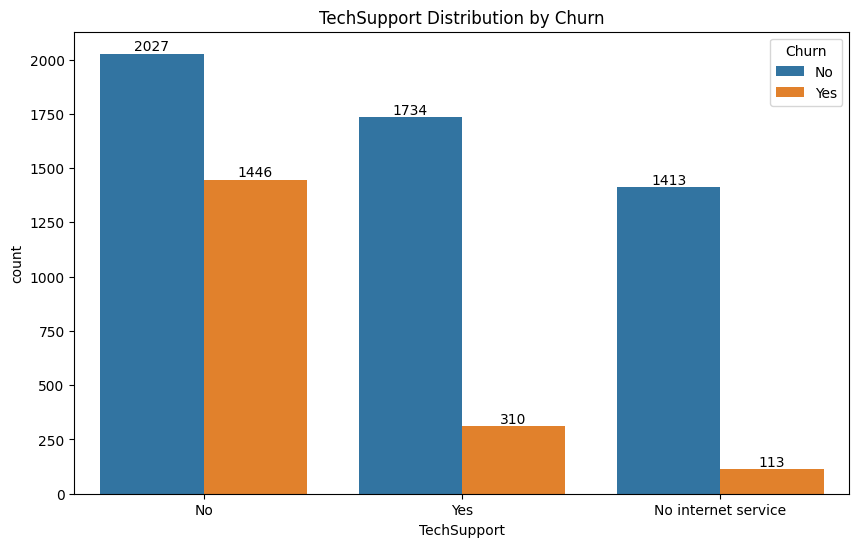

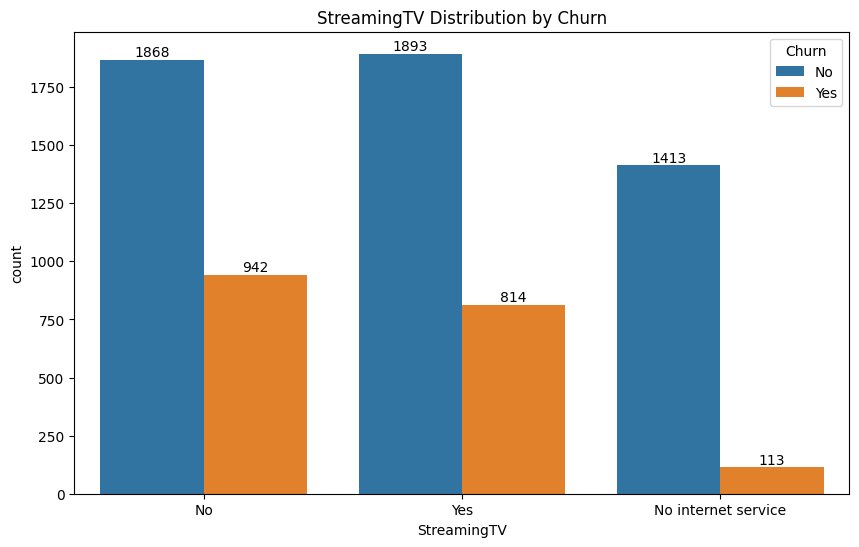

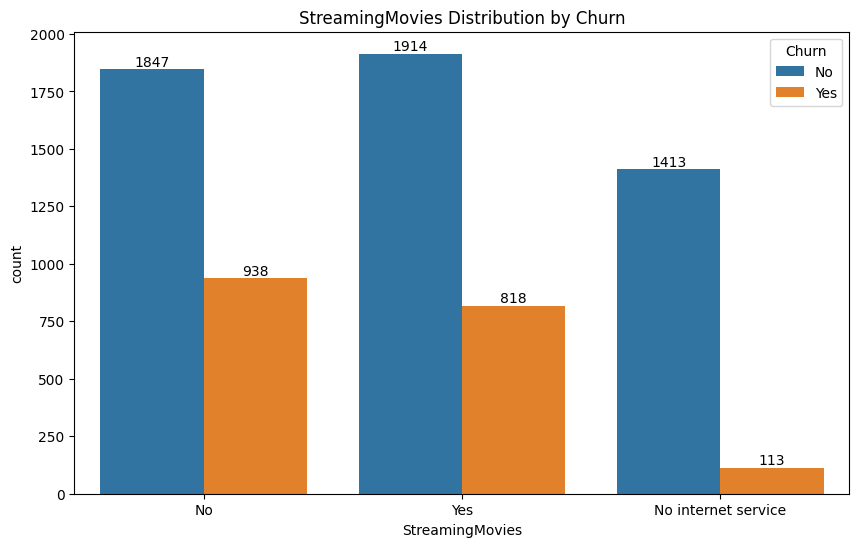

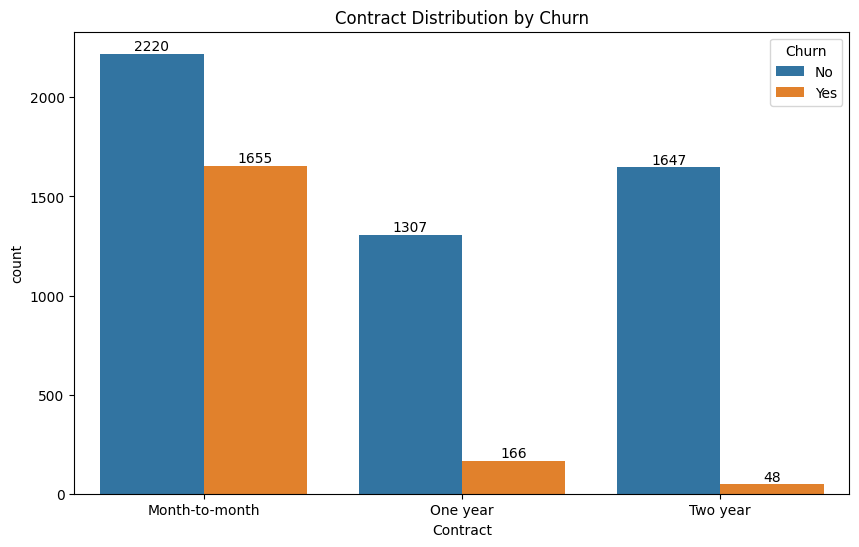

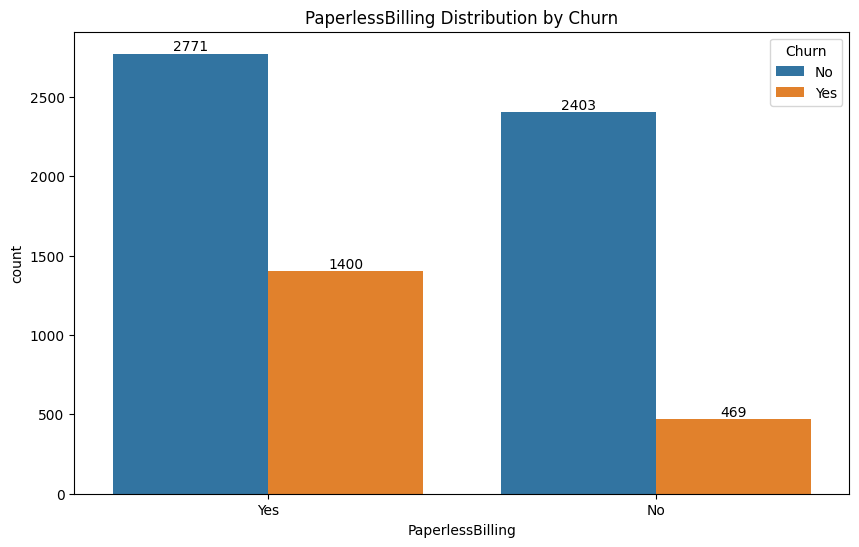

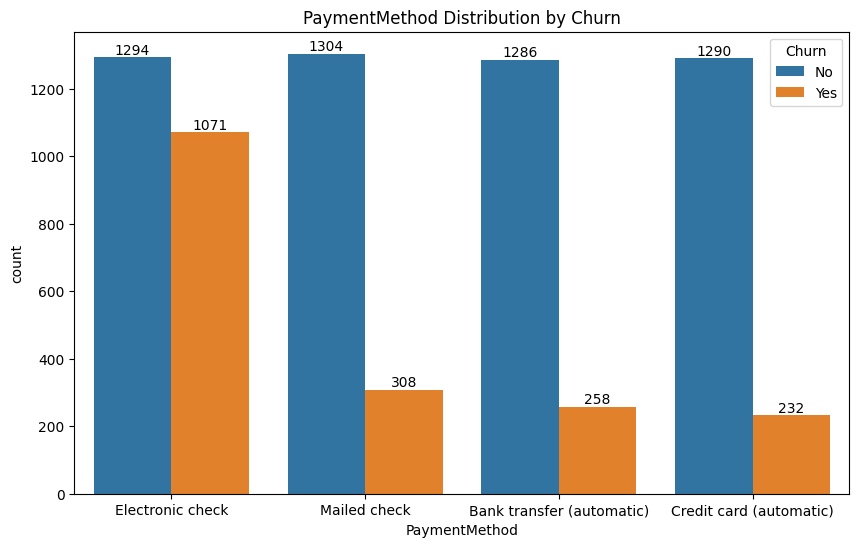

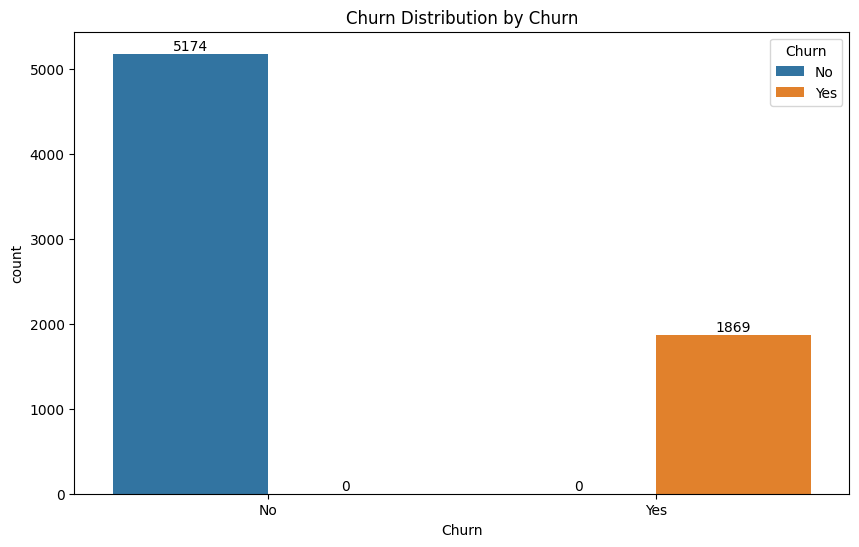

In [12]:
#Selecting columns with non-numeric
categorical_columns = df.select_dtypes(include=["object"]).columns

#A for loop to plot each categorical column against target (Churn).
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, hue='Churn', data=df)

    # Labeling the bars
    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="edge", color="black", fmt="%d"
        )

    plt.title(f'{col} Distribution by Churn')
    plt.show()


# In the above barcharts for the non-numeric columns, I studied the Telco Customer Churn dataset to understand the customer churn behavior. I analyzed various categorical variables in relation to the "Churn Label," which indicates whether a customer has churned ("Yes") or not ("No").

# Applying label encoding to non-numeric columns

In [13]:
#Encoding the non-numeric variables
encoder = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = encoder.fit_transform(df[col])

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Checking the correlation between the features and the target

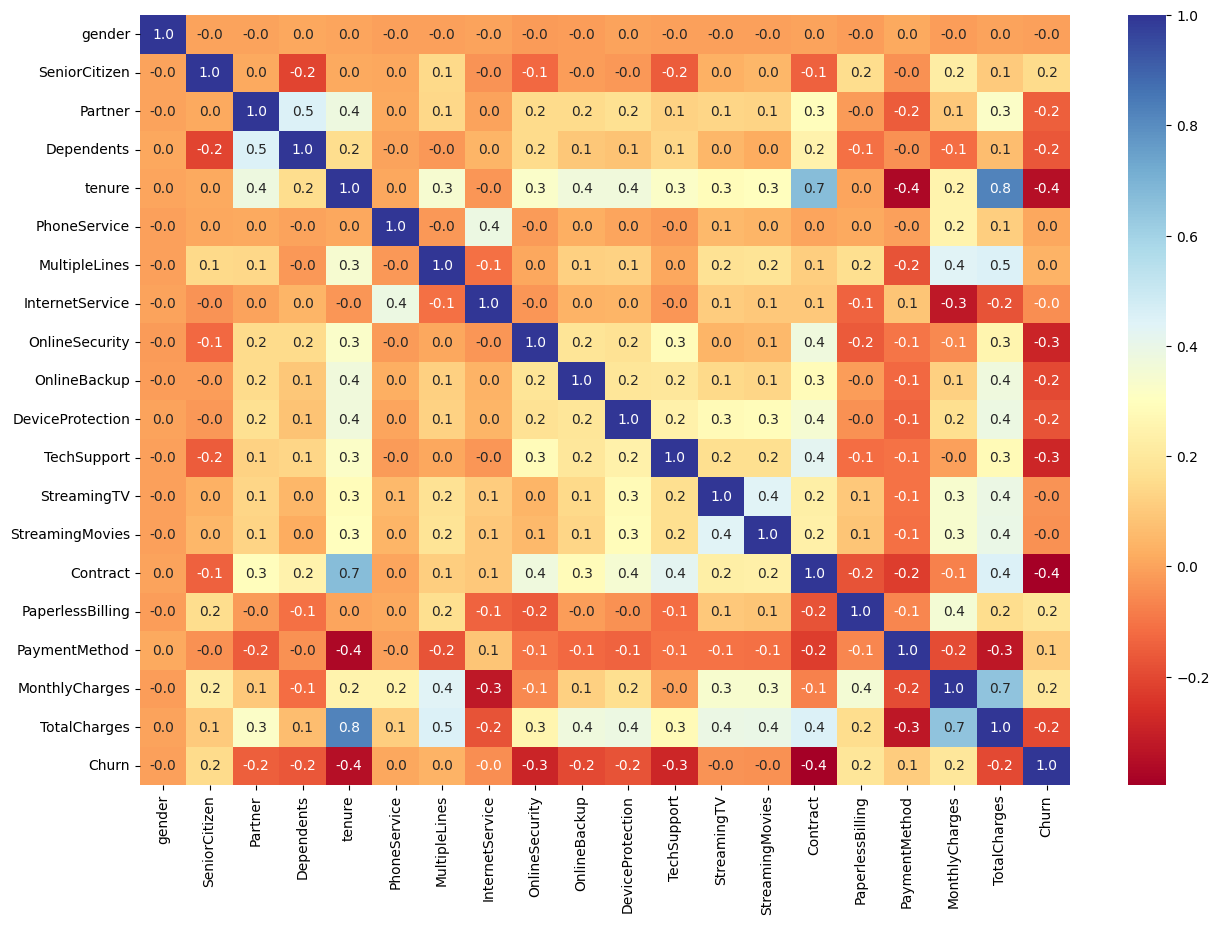

In [15]:
#Checking the correlation between the features and the target
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

#Using a threshold of 0.02 to filter out the features that have a low correlation

In [16]:
#Using a threshold of 0.02 to filter out the features that have a low correlation
threshold = 0.02
corr = df.corr()
corr_target = abs(corr['Churn'])
relevant_features = corr_target[corr_target > threshold].index
print(relevant_features)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [17]:
#Spliting the data into train and test sets
X = df[relevant_features].drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [18]:
#Scaling the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Defining the input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# Defining the hidden layers
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(32, activation='relu')(hidden1)

# Defining the output layer
outputs = Dense(1, activation='sigmoid')(hidden2)

# Creating the model
model = Model(inputs=inputs, outputs=outputs)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluating the model before GridSearchCV
y_pred_before = model.predict(X_test_scaled)
accuracy_before = accuracy_score(y_test, y_pred_before.round())
auc_score_before = roc_auc_score(y_test, y_pred_before)

print("Evaluation before GridSearchCV:")
print(f"Accuracy: {accuracy_before}")
print(f"AUC Score: {auc_score_before}")


Epoch 1/10
177/177 [==============================] - 4s 8ms/step - loss: 0.4586 - accuracy: 0.7762 - val_loss: 0.4344 - val_accuracy: 0.7935
Epoch 2/10
177/177 [==============================] - 1s 5ms/step - loss: 0.4213 - accuracy: 0.7993 - val_loss: 0.4277 - val_accuracy: 0.7970
Epoch 3/10
177/177 [==============================] - 1s 6ms/step - loss: 0.4163 - accuracy: 0.8069 - val_loss: 0.4290 - val_accuracy: 0.7935
Epoch 4/10
177/177 [==============================] - 2s 10ms/step - loss: 0.4121 - accuracy: 0.8049 - val_loss: 0.4272 - val_accuracy: 0.7956
Epoch 5/10
177/177 [==============================] - 2s 11ms/step - loss: 0.4083 - accuracy: 0.8122 - val_loss: 0.4323 - val_accuracy: 0.7906
Epoch 6/10
177/177 [==============================] - 2s 11ms/step - loss: 0.4060 - accuracy: 0.8117 - val_loss: 0.4293 - val_accuracy: 0.7892
Epoch 7/10
177/177 [==============================] - 2s 9ms/step - loss: 0.4035 - accuracy: 0.8135 - val_loss: 0.4293 - val_accuracy: 0.7956
Epo

In [20]:
# Function to create the MLP model
def create_model(hidden1_units=64, hidden2_units=32,learning_rate=0.001):
    inputs = Input(shape=(X_train_scaled.shape[1],))
    hidden1 = Dense(hidden1_units, activation='relu')(inputs)
    hidden2 = Dense(hidden2_units, activation='relu')(hidden1)
    outputs = Dense(1, activation='sigmoid')(hidden2)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Creating a KerasClassifier with the model and necessary parameters
model = KerasClassifier(build_fn=create_model, epochs=10,batch_size=32, verbose=0)

# Defining the hyperparameters grid
param_grid = {
    'hidden1_units': [32, 64, 128],
    'hidden2_units': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1]


}

# Using GridSearchCV to search for the best combination of hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Getting the best model
best_model = grid_result.best_estimator_

# Evaluating the best model on the test set
y_pred_after = best_model.predict(X_test_scaled)
accuracy_after = accuracy_score(y_test, y_pred_after.round())
auc_score_after = roc_auc_score(y_test, y_pred_after)

print("\nEvaluation after GridSearchCV:")
print(f"Accuracy: {accuracy_after}")
print(f"AUC Score: {auc_score_after}")

<ipython-input-20-e697b8e35314>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10,batch_size=32, verbose=0)


Best: 0.802449 using {'hidden1_units': 32, 'hidden2_units': 32, 'learning_rate': 0.01}
45/45 [==============================] - 0s 3ms/step

Evaluation after GridSearchCV:
Accuracy: 0.7899219304471257
AUC Score: 0.7084424810767521


In [21]:
# Saving the trained model
best_model.model.save('best_model.h5')

# Saving the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']